# Projet de Machine learning
Mélissa Ouada et Maxime Zielinger

## - 2nd tour -

# Partie 1 : traitement et nettoyage des données

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import sklearn.linear_model as lm
import statsmodels 
from statsmodels.regression.linear_model import OLS

C:\Users\maxim\AppData\Local\Temp\ipykernel_20700\2219923951.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Chargement des datasets
chemin_dataset = '../data/resultats-par-niveau-subcom-t2-france-entiere.xlsx'
data = pd.read_excel(chemin_dataset) # Le dataset des votes

chemin_datasup = '../data/Niveau_de_vie_2013_a_la_commune-Global_Map_Solution.xlsx'
supData = pd.read_excel(chemin_datasup) # Le dataset du niveau de vie

print(data.head())
print("\n")
print(supData.head())
print("\n") 

  Code du département Libellé du département  Code de la commune  \
0                  01                    Ain                   1   
1                  01                    Ain                   2   
2                  01                    Ain                   4   
3                  01                    Ain                   5   
4                  01                    Ain                   6   

     Libellé de la commune Etat saisie  Inscrits  Abstentions  % Abs/Ins  \
0  L'Abergement-Clémenciat     Complet       643          146      22.71   
1    L'Abergement-de-Varey     Complet       213           45      21.13   
2        Ambérieu-en-Bugey     Complet      8763         2448      27.94   
3      Ambérieux-en-Dombes     Complet      1282          266      20.75   
4                  Ambléon     Complet       103           19      18.45   

   Votants  % Vot/Ins  ...  Voix  % Voix/Ins  % Voix/Exp  Unnamed: 26  \
0      497      77.29  ...   237       36.86       52.67     

In [4]:
# Conversion des codes de département qui ne sont pas des chiffres pour faciliter les traitements.
def convertDepartment(data):
    code_dict = {'2A': 96, '2B' : 97,'ZP' : 98, 'ZS' : 99, 'ZW' : 100, 'ZX' : 101, 'ZZ' : 102, "ZN" : 103, 'ZD' : 104, 'ZM' : 105, 'ZC' : 106, 'ZB' : 107, 'ZA' : 108}

    for i in data['Code du département']:
        if i in code_dict:
            data['Code du département'] = data['Code du département'].replace(i, code_dict[i])
    
    return data

In [5]:
# On sépare le code commune en deux pour pouvoir le comparer au dataset présidentiel et ajouter de nouvelles valeurs à notre dataset final.
supData['Code du département'] = supData['Code Commune'].str.slice(stop=2)
supData['Code de la commune'] = supData['Code Commune'].str.slice(start=2)

# On drop les colonnes qui n'ont plus d'intérêt
supData = supData.drop(columns=['Code Commune'])
supData = supData.drop(columns=['Nom Commune'])

supData['Code de la commune'] = supData['Code de la commune'].astype('Int64')

# Inner permet d'éliminer les données qui ne matchent pas.
data = data.merge(supData, how='inner',on = ['Code du département','Code de la commune'])

# Certaintes lignes du niveau de vie n'ont pas de valeur, comme il y en a peu, nous avons préféré les supprimer afin de ne pas potentiellement fausser les résultats.
data = data.dropna()

# On rétablis les index aux bonnes valeurs pour éviter des erreurs au moment de parse la data.
data = data.reset_index()

In [6]:
# Certaines colonnes n'ont pas de nom, dans un soucis de compréhension, nous avons choisi de les renommer tel que M = Macron et L = Lepen.

data.rename(columns={'N°Panneau':'N°Panneau_M'}, inplace=True)
data.rename(columns={'Sexe':'Sexe_M'}, inplace=True)
data.rename(columns={'Nom':'Nom_M'}, inplace=True)
data.rename(columns={'Prénom':'Prénom_M'}, inplace=True)
data.rename(columns={'Voix':'Voix_M'}, inplace=True)
data.rename(columns={'% Voix/Ins':'% Voix/Ins_M'}, inplace=True)
data.rename(columns={'% Voix/Exp':'% Voix/Exp_M'}, inplace=True)

data.rename(columns={'Unnamed: 26':'N°Panneau_L'}, inplace=True)
data.rename(columns={'Unnamed: 27':'Sexe_L'}, inplace=True)
data.rename(columns={'Unnamed: 28':'Nom_L'}, inplace=True)
data.rename(columns={'Unnamed: 29':'Prénom_L'}, inplace=True)
data.rename(columns={'Unnamed: 30':'Voix_L'}, inplace=True)
data.rename(columns={'Unnamed: 31':'% Voix/Ins_L'}, inplace=True)
data.rename(columns={'Unnamed: 32':'% Voix/Exp_L'}, inplace=True)


In [7]:
#Affichage des informations sur le dataset
print(data.shape)
print(data.columns)
print(data.dtypes)

(31368, 36)
Index(['index', 'Code du département', 'Libellé du département',
       'Code de la commune', 'Libellé de la commune', 'Etat saisie',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau_M',
       'Sexe_M', 'Nom_M', 'Prénom_M', 'Voix_M', '% Voix/Ins_M', '% Voix/Exp_M',
       'N°Panneau_L', 'Sexe_L', 'Nom_L', 'Prénom_L', 'Voix_L', '% Voix/Ins_L',
       '% Voix/Exp_L', 'Niveau de vie Commune', 'Niveau de vie Département'],
      dtype='object')
index                          int64
Code du département           object
Libellé du département        object
Code de la commune             int64
Libellé de la commune         object
Etat saisie                   object
Inscrits                       int64
Abstentions                    int64
% Abs/Ins                    float64
Votants                        int64
% Vot/Ins

# Partie 2 : Analyse manuelle des données

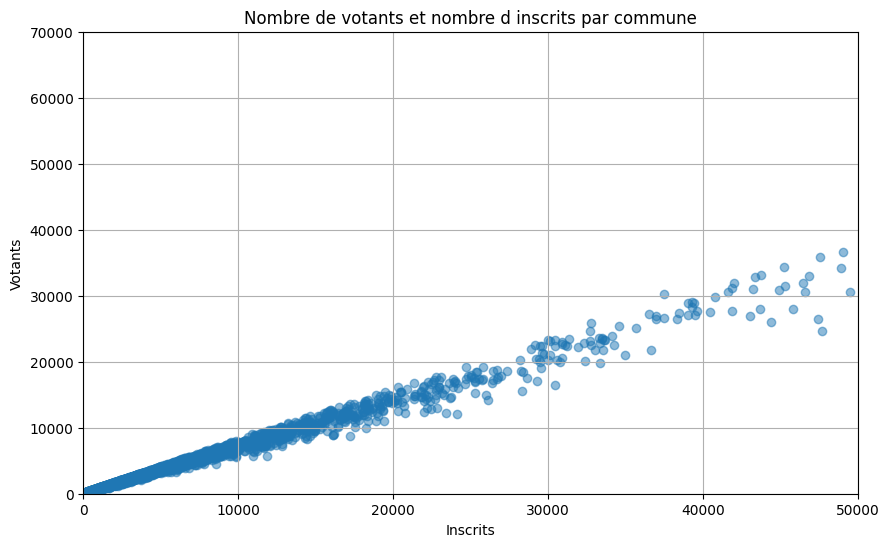

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Inscrits'], data['Votants'], alpha=0.5)
plt.title('Nombre de votants et nombre d inscrits par commune')
plt.xlabel('Inscrits')
plt.ylabel('Votants')
plt.grid(True)
plt.xlim(0,50000) # à commenter pour avoir la totalité du graphe
plt.ylim(0,70000) #
plt.show()

La France est composée d'énormément de petites communes, nous avons donc la majorité des valeurs regroupées à un endroit avec quelques points éparses sur le reste du graphe.\
C'est un problème car ces points, certes éparses, représentent les grandes villes et donc une partie importante de nos données.\
Une représentation graphique où l'on regarde le nombre d'inscrits/de votants par commune ne semble pas être intéressant. Il serait donc préférable d'utiliser les pourcentages dans cette partie.

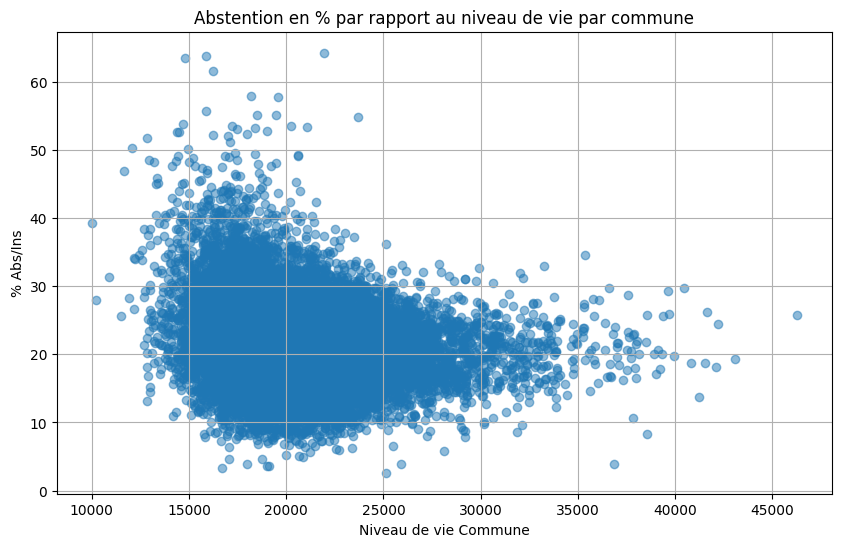

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Niveau de vie Commune'], data['% Abs/Ins'], alpha=0.5)
plt.title('Abstention en % par rapport au niveau de vie par commune')
plt.xlabel('Niveau de vie Commune')
plt.ylabel('% Abs/Ins')
plt.grid(True)
plt.show()

Le niveau de vie des communes semble avoir une influence sur l'abstention mais il est difficile avec un graphe comme celui-ci d'avoir une idée précise de son impacte réel.

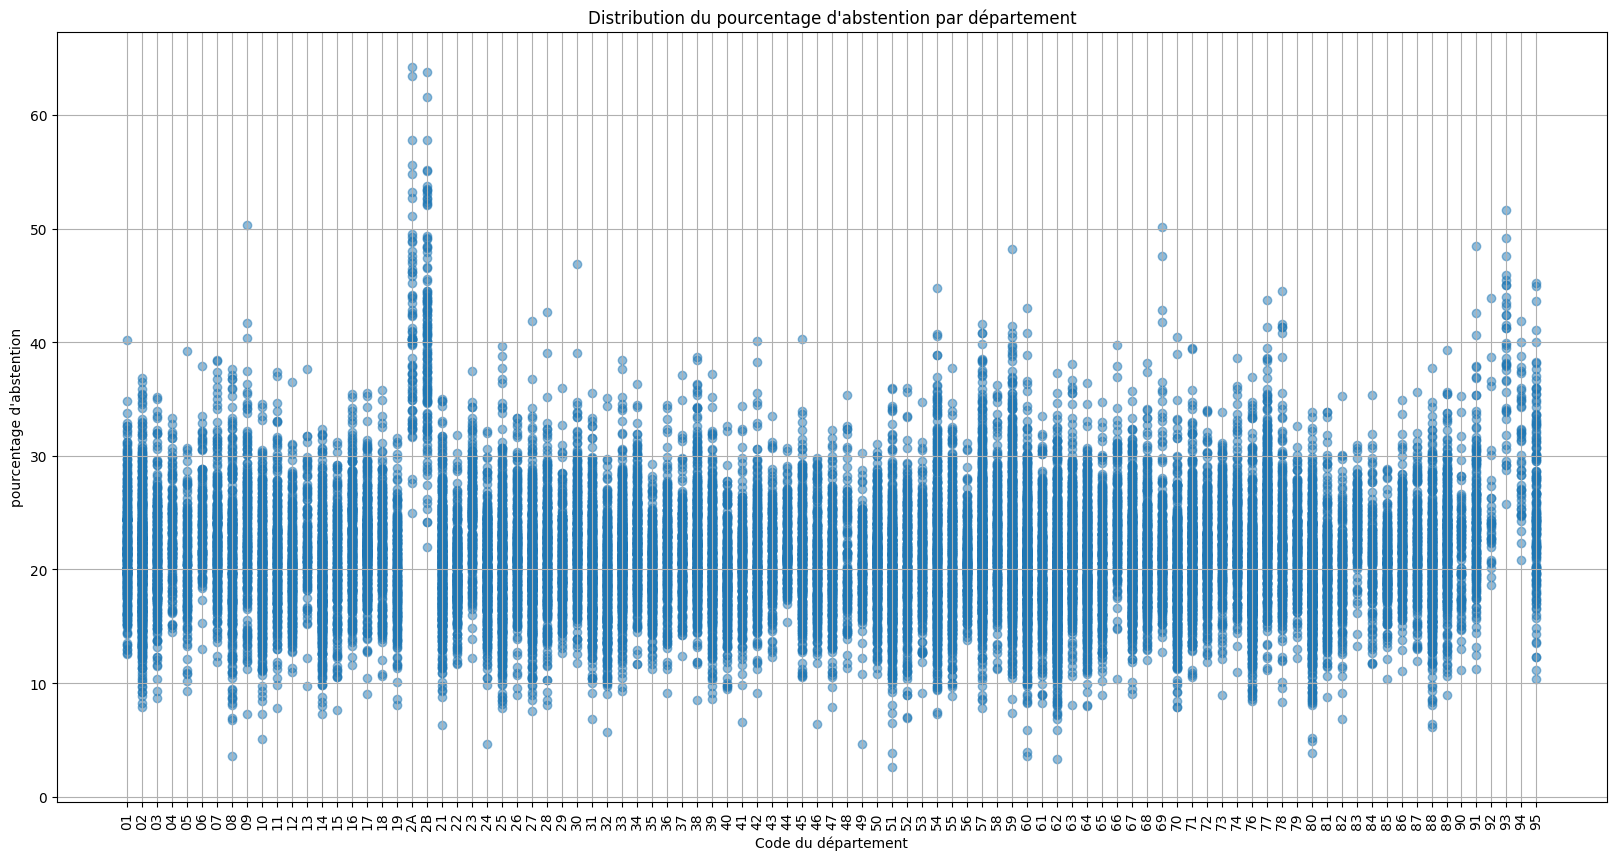

In [10]:
plt.figure(figsize=(20,10)) 
plt.scatter(data['Code du département'], data['% Abs/Ins'], alpha=0.5)
plt.title('Distribution du pourcentage d\'abstention par département')
plt.xlabel('Code du département')
plt.ylabel('pourcentage d\'abstention')
plt.grid(True)
plt.xticks(rotation=90)  
# Affichage du graphique configuré
plt.show()

La comparaison du pourcentage d'abstention par département semble donner des résultats bien plus intéressants que les précédents.\
On peut constater une tendance entre 10% et 40% d'abstention pour la france métropolitaine (corse exclue).\
Il est aussi important de noter que les outre-mers et français de l'étranger ne sont pas présents sur ce graphique car éliminés par les précédents traitements. Selon nos tests cependant, nous avons constaté que ces derniers se retrouvaient avec une abstention bien plus haute que la moyenne.\

Ce graphe nous a convaincu de tenter une prédiction de l'abstention de différentes manières pour tenter de comprendre quels facteurs impactent cette statistique.

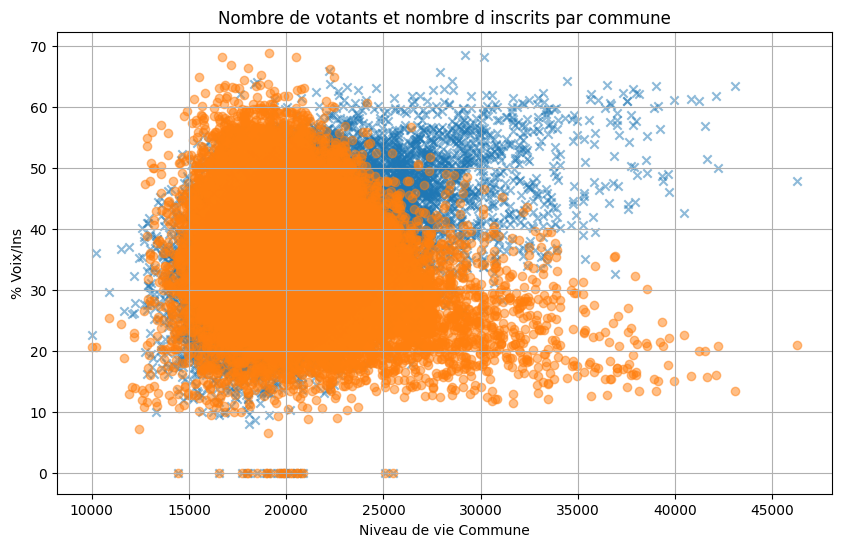

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Niveau de vie Commune'], data['% Voix/Ins_M'],marker='x', alpha=0.5)
plt.scatter(data['Niveau de vie Commune'], data['% Voix/Ins_L'],marker='o', alpha=0.5)
plt.title('Nombre de votants et nombre d inscrits par commune')
plt.xlabel('Niveau de vie Commune')
plt.ylabel('% Voix/Ins')
plt.grid(True)
plt.show()

Lors d'une comparaison entre le niveau de vie d'une commune et les votes pour chaque candidat, il est intéressant de constater qu'à partir d'un certain seuil (environ 25000), les votes ont tendance à être plus dirigés vers Macron que Lepen.\
Avant ce seuil cependant, les résultats semblent être mitigés.\
Nous pensons néanmoins qu'il serait intéressant d'essayer d'analyser plus en détails ces résultats pour trouver quels facteurs sont déterminants dans le choix d'un candidat (en clair, est ce que le niveau de vie d'une commune peut définir à lui seul une tendance ou y a t'il d'autres données qui entrent en jeu).

*Note : Une partie sur un réseau de neurones a été supprimée car aucun résultat n'était concluant. Nous avons préféré garder les produits finis sans les tentatives échouées.*\
*Cette partie est encore visible dans les commits du gitlab, et a été supprimée au commit "Suppression du neural network".*

# Partie 3 : Régressions

## Régression sur l'abstention

In [12]:
# Le but de ce traitement des données est de sélectionner toutes les colonnes utilisables pour vérifier lesquelles sont pertinentes afin de prédire l'abstention.
data1 = data.copy() 

data1 = convertDepartment(data1) # La fonction se trouve dans les premières cases du projet.

data1['Code du département'] = data1['Code du département'].astype(int)

data1 = data1.drop(columns= ['Libellé du département', 'Libellé de la commune', 'Etat saisie', 'Sexe_M', 'Nom_M', 'Prénom_M', 'Sexe_L', 'Nom_L', 'Prénom_L'])

X = data1[['Code du département','Code de la commune','Inscrits','Voix_M','Niveau de vie Commune','Niveau de vie Département']]

# Nous avons préféré dupliquer les deux résultats possibles afin de s'assurer de trouver le modèle le plus adapté. 
# Cela ne pose pas de problèmes car il est possible de passer de l'une à l'autre des valeurs d'abstention grâce aux nombre d'inscrits.
y1 = data1['% Abs/Ins']
y2 = data1['Abstentions']
print(X.head())


   Code du département  Code de la commune  Inscrits  Voix_M  \
0                    1                   1       643     237   
1                    1                   2       213      94   
2                    1                   4      8763    3080   
3                    1                   5      1282     451   
4                    1                   6       103      45   

   Niveau de vie Commune  Niveau de vie Département  
0           22130.000000               22343.574665  
1           23213.000000               22343.574665  
2           19554.000000               22343.574665  
3           22387.619048               22343.574665  
4           21871.666667               22343.574665  


In [13]:
# Créer le modèle OLS
m = OLS(y1, X)
n = OLS(y2, X)
results1 = m.fit()
su1 = results1.summary()
results2 = n.fit()
su2 = results2.summary()
su2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Abstentions   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.183e+05
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:24:46   Log-Likelihood:                     -2.1029e+05
No. Observations:               31368   AIC:                                  4.206e+05
Df Residuals:                   31362   BIC:                                  4.206e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Code du département           0.3638      0.044      8.221      0.000       0.277       0.451
Code de la commune            0.0647      0.006     10.528      0.000       0.053       0.077
Inscrits                      0.4107      0.001    334.236      0.000       0.408       0.413
Voix_M                       -0.2402      0.003    -86.985      0.000      -0.246      -0.235
Niveau de vie Commune        -0.0140      0.000    -30.096      0.000      -0.015      -0.013
Niveau de vie Département     0.0086      0.000     17.792      0.000       0.008       0.010
==============================================================================
Omnibus:                    40369.030   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         68261724.812
Skew:                           6.321   Prob(JB):                         0.00
Kurtosis:                     231.184   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nous pouvons constater que notre R² est à 0.984 ce qui est excellent.\
Nous pouvons aussi voir que la colonne P > |t| est à 0 ce qui nous permet de conclure qu'aucune colonne ne doit être retirée des colonnes de X.\
Il est donc possible à présent d'effectuer les régressions linéaires.

In [14]:
# Créer un modèle de régression linéaire
model = lm.LinearRegression()
model.fit(X, y1)

print(model.score(X,y1))
print(model.coef_)
print(model.intercept_)

0.17897541612124002
[ 0.01559335 -0.00090459  0.00127207 -0.00234615 -0.00050954  0.00068005]
17.133934989175412


In [15]:
model = lm.LinearRegression()
model.fit(X, y2)

print(model.score(X,y2))
print(model.coef_)
print(model.intercept_)

0.9829638124728894
[ 0.37168721  0.06226871  0.41018011 -0.23870857 -0.01390865  0.00508324]
68.18816319251147


Après avoir effectué une régression linéaire pour chaque sortie possible, nous pouvons constater que les résultats pour y2 (qui correspond au nombre de personnes s'étant abstenus) sont bien meilleurs.\
Il semble donc plus efficace de prédire le nobmre de personnes s'étant abstenus plutôt que le pourcentage d'abstention avec nos valeurs de X.

## Régression sur le candidat avec le plus de voix

Nous essayons maintenant de travailler avec les résultats de chaque candidat, la procédure est la même, mais nous avons décidé d'utiliser plusieurs méthodes pour choisir la meilleure.

In [16]:
# Cette partie de traitement des données est sensiblement la même que celle vue précédemment.
data2 = data.copy() 

data2 = convertDepartment(data2)

data2['Code du département'] = data2['Code du département'].astype(int)

data2 = data2.drop(columns= ['Libellé du département', 'Libellé de la commune', 'Etat saisie', 'Sexe_M', 'Nom_M', 'Prénom_M', 'Sexe_L', 'Nom_L', 'Prénom_L']) 
features_to_exclude = ['Voix_M', '% Voix/Ins_M', '% Voix/Exp_M', 
                       'Voix_L', '% Voix/Ins_L', '% Voix/Exp_L', 'N°Panneau_L', 'N°Panneau_M']

X = data2.drop(columns=features_to_exclude)

In [17]:
# L'avantage du second tour réside dans son nombre de candidats. Cela facilite le code de recherche du résultat le plus haut. Il sera logiquement modifié pour le tour 1.
y = []
for i in range(len(data2)):
    if data2['Voix_M'][i] > data2['Voix_L'][i]:
        y.append(1)
    else:
        y.append(2)
y = np.array(y)

In [18]:
def plot_decision_boundary(pred_func, x, y, figure=None): # Récupéré des anciens TP.
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)

In [19]:
# Créer le modèle OLS
m = OLS(y, X)
print(m)
results = m.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                          2.035e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:24:47   Log-Likelihood:                         -20347.
No. Observations:               31368   AIC:                                  4.073e+04
Df Residuals:                   31351   BIC:                                  4.087e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
index                      -3.16e-06   1.11e-06     -2.851      0.004   -5.33e-06   -9.87e-07
Code du département           0.0015      0.000      3.409      0.001       0.001       0.002
Code de la commune            0.0002   1.47e-05     13.447      0.000       0.000       0.000
Inscrits                  -8.488e-05   9.53e-06     -8.906      0.000      -0.000   -6.62e-05
Abstentions                   0.0001   1.18e-05     10.165      0.000    9.66e-05       0.000
% Abs/Ins                    -0.2756      0.524     -0.526      0.599      -1.302       0.751
Votants                      -0.0002   1.97e-05    -10.393      0.000      -0.000      -0.000
% Vot/Ins                     0.5898      0.696      0.847      0.397      -0.775       1.954
Blancs                       -0.0001   4.82e-05     -3.072      0.002      -0.000   -5.36e-05
% Blancs/Ins                 -0.7856      0.459     -1.710      0.087      -1.686       0.115
% Blancs/Vot                  0.2074      0.524      0.396      0.692      -0.819       1.234
Nuls                         -0.0004   6.16e-05     -5.743      0.000      -0.000      -0.000
% Nuls/Ins                   -0.9335      0.460     -2.031      0.042      -1.834      -0.033
% Nuls/Vot                    0.3552      0.524      0.678      0.498      -0.671       1.382
Exprimés                      0.0003   3.25e-05      9.143      0.000       0.000       0.000
% Exp/Ins                    -0.8711      0.459     -1.896      0.058      -1.771       0.029
% Exp/Vot                     0.3109      0.524      0.594      0.553      -0.716       1.337
Niveau de vie Commune     -4.048e-05   1.15e-06    -35.105      0.000   -4.27e-05   -3.82e-05
Niveau de vie Département -2.571e-05   2.34e-06    -10.985      0.000   -3.03e-05   -2.11e-05
==============================================================================
Omnibus:                   219590.279   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2317.788
Skew:                          -0.099   Prob(JB):                         0.00
Kurtosis:                       1.683   Cond. No.                     1.67e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.3e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Ici, nous pouvons constater un R² légèrement plus faible (mais toujours très largement acceptable) mais une colonne P > |t| avec des lignes supérieurs à 0.05.\
Il est donc nécessaire de retirer les colonnes du dataset correspondantes et de refaire un affichage.

In [20]:
features_to_exclude = ['% Abs/Ins','% Vot/Ins','% Blancs/Ins','% Blancs/Vot','% Nuls/Vot','% Exp/Ins','% Exp/Vot']

X = X.drop(columns=features_to_exclude)
# Créer le modèle OLS
m = OLS(y, X)
print(m)
results = m.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          2.814e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:24:47   Log-Likelihood:                         -23293.
No. Observations:               31368   AIC:                                  4.661e+04
Df Residuals:                   31358   BIC:                                  4.669e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
index                     -1.198e-05   1.14e-06    -10.504      0.000   -1.42e-05   -9.74e-06
Code du département           0.0049      0.000     10.914      0.000       0.004       0.006
Code de la commune            0.0004   1.59e-05     23.077      0.000       0.000       0.000
Inscrits                     -0.0001   1.03e-05    -10.204      0.000      -0.000   -8.47e-05
Abstentions                   0.0002   1.28e-05     14.095      0.000       0.000       0.000
Votants                      -0.0003   2.13e-05    -13.372      0.000      -0.000      -0.000
Blancs                       -0.0005   5.13e-05    -10.684      0.000      -0.001      -0.000
Nuls                         -0.0001   6.66e-05     -2.180      0.029      -0.000   -1.47e-05
% Nuls/Ins                    0.0059      0.001      4.410      0.000       0.003       0.008
Exprimés                      0.0004    3.5e-05     11.655      0.000       0.000       0.000
Niveau de vie Commune     -4.012e-05   1.22e-06    -32.899      0.000   -4.25e-05   -3.77e-05
Niveau de vie Département     0.0001   1.27e-06     88.777      0.000       0.000       0.000
==============================================================================
Omnibus:                    31865.164   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1972.753
Skew:                          -0.093   Prob(JB):                         0.00
Kurtosis:                       1.786   Cond. No.                     1.65e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.34e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Cette fois-ci, tout est rentré dans l'ordre. Seule la ligne "Nuls" est supérieur à 0 mais elle reste inférieur à 0.05 et n'est donc pas à exclure.\
Tout est bon, il est maintenant temps de passer aux classifications.

In [21]:
SGD_model = SGDClassifier()
SGD_model.fit(X, y)

print(f"Model weights (theta_1, theta_2): {SGD_model.coef_}, bias (theta_0): {SGD_model.intercept_}")
print(f"r^2: {SGD_model.score(X, y)}")
# Nous pouvons constater que la précision de notre modèle est à 0.65 ce qui n'est pas exceptionnel, mais qui reste mieux que l'aléatoire (qui serait en théorie à 0.5).

Model weights (theta_1, theta_2): [[   -8.87715685   992.20393116   401.81205882  -703.22052031
    866.83694369 -1570.057464   -6431.6806211   2217.20079227
   -181.26688638  2644.42236484   -52.22590928    70.69045306]], bias (theta_0): [561.99823501]
r^2: 0.6277735271614384


In [22]:
lr_model = LogisticRegression(solver='newton-cholesky',max_iter=1000)

# Train the model
lr_model.fit(X, y)

print(f"Model weights (theta_1, theta_2): {lr_model.coef_}, bias (theta_0): {lr_model.intercept_}")
print(f"r^2: {lr_model.score(X, y)}")
# Comme le SGD Classifier, la régression logistique donne des résultats moyens, mais mieux qu'un aléatoire pur.

Model weights (theta_1, theta_2): [[-1.09986671e-05  6.19517878e-03  8.66270989e-04 -2.03238485e-03
   2.47668250e-03 -4.50906769e-03 -2.37886062e-02  1.14322161e-02
  -9.20255025e-02  7.84732253e-03 -1.78464060e-04 -1.05259355e-04]], bias (theta_0): [6.05001862]
r^2: 0.6690895179801071


# Conclusion

Il est difficile de prédire de façon concrète une abstention ou un vote. Cela semble d'ailleurs assez logique. Cependant, les résultats que nous avons obtenu semblent montrer qu'il ne s'agit pas d'un pattern aléatoire non plus (auquel cas notre R² serait à 0.5). Il est donc possible, à la manière d'un sondage, de constater une tendance générale d'après les valeurs d'une partie des communes.